예제 문제

In [40]:
# 로또 번호 추천기
import random
numbers = list(range(1, 46))

def generate_lotto_numbers():
    random.shuffle(numbers)
    return numbers[:6]

print(generate_lotto_numbers())

[31, 24, 41, 45, 12, 8]


In [ ]:
# 업다운 게임
import random

def play_guessing_game():
    random_number = random.randint(1, 100)
    
    while True:
        user_input = int(input("1~100 사이의 숫자를 입력하세요: "))
        
        if user_input == random_number:
            print("대단하시네요! 정답을 맞추셨어요!")
            break
        elif user_input < random_number:
            print("입력하신 숫자가 정답보다 작네요!")
        else:
            print("입력하신 숫자가 정답보다 크네요!")
            
play_guessing_game()

In [ ]:
# 구구단
def multiply_table():
    for i in range(2, 10):
        print(f"{i}단:")
        for j in range(1, 10):
            print(f"{i} x {j} = {i*j}")

multiply_table()

student performance dataset : 
https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

컬럼 정보
Student ID
- StudentID: A unique identifier assigned to each student (1001 to 3392).

Demographic Details
- Age(나이): The age of the students ranges from 15 to 18 years.
- Gender(성별): Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity(인종): The ethnicity of the students, coded as follows:
>0: Caucasian
    1: African American
    2: Asian
    3: Other

- ParentalEducation(부모 교육수준): The education level of the parents, coded as follows:
>0: None
    1: High School
    2: Some College
    3: Bachelor's
    4: Higher

Study Habits
- StudyTimeWeekly(주중 학습시간): Weekly study time in hours, ranging from 0 to 20.
- Absences(결석일수): Number of absences during the school year, ranging from 0 to 30.
- Tutoring(과외여부): Tutoring status, where 0 indicates No and 1 indicates Yes

Parental Involvement
- ParentalSupport(부모의 지원): The level of parental support, coded as follows:
>0: None
    1: Low
    2: Moderate
    3: High
    4: Very High

Extracurricular Activities
- Extracurricular(교육과정외 활동여부): Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports(운동): Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music(음악): Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering(봉사): Participation in volunteering, where 0 indicates No and 1 indicates Yes.

Academic Performance
- GPA(학습 성과): Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

Target Variable: Grade Class
- GradeClass(성적 분포): Classification of students' grades based on GPA:
>0: 'A' (GPA >= 3.5)
    1: 'B' (3.0 <= GPA < 3.5)
    2: 'C' (2.5 <= GPA < 3.0)
    3: 'D' (2.0 <= GPA < 2.5)
    4: 'F' (GPA < 2.0)

# 패키지 임포트

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Silence Warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [19]:
df = pd.read_csv('../../data/sklearn_regression/Student_performance_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# EDA

## 데이터 분리(EDA 과정에서 test에 사용할 데이터 제외)

In [21]:
# 데이터 분리 (80% train, 20% test)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 14) (1913,) (479, 14) (479,)


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>, <Axes: >, <Axes: >]],
      dtype=object)

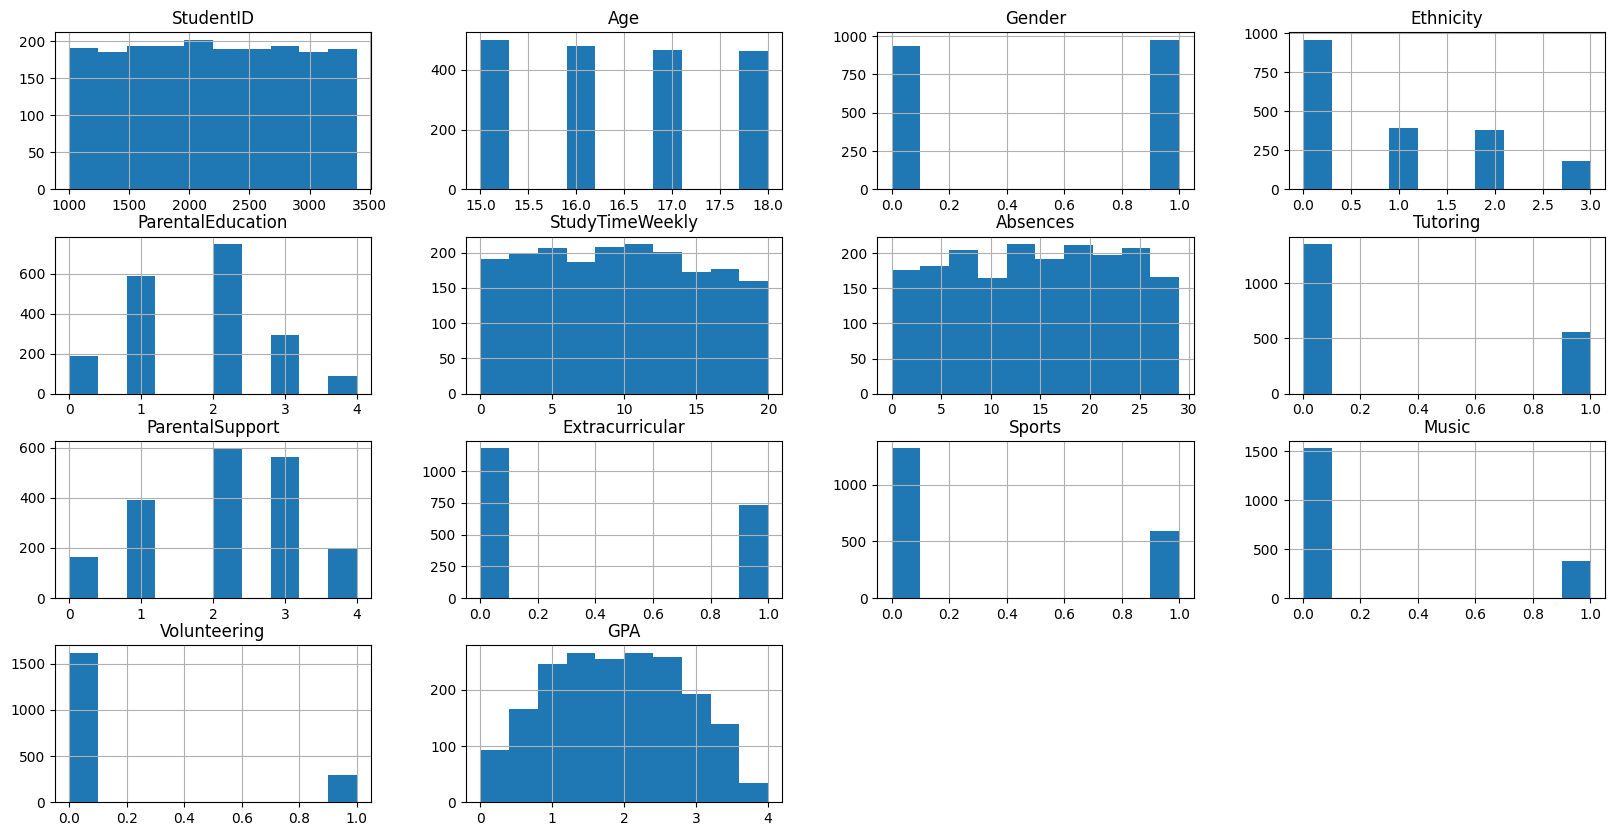

In [22]:
X_train.hist(figsize=(20,10))

##  수치형과 범주형 데이터 구분

In [23]:
columns = list(X_train.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(X_train[i].unique()) > 5: # 데이터가 5개 이상의 고유값이 있을 경우 수치형 데이터로 취급
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        
# Assuming the first column is an ID or non-numeric feature
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


In [24]:
# 수치형 데이터 변환(int → float)
X_train[numeric_columns] = X_train[numeric_columns].astype('float64')
X_test[numeric_columns] = X_test[numeric_columns].astype('float64')

## 인코딩

In [25]:
# LabelEncoder 호출
label_encoder = LabelEncoder()

# 범주형 컬럼 인코딩
X_train_en = X_train.copy()
for column in X_train_en[categoric_columns]:  
    X_train_en[column] = label_encoder.fit_transform(X_train_en[column])
X_test_en = X_test.copy()
for column in X_test_en[categoric_columns]:  
    X_test_en[column] = label_encoder.fit_transform(X_test_en[column])

# 수치형 컬럼 정규화
scaler = StandardScaler()
X_train_en[numeric_columns] = scaler.fit_transform(X_train_en[numeric_columns])
X_test_en[numeric_columns] = scaler.fit_transform(X_test_en[numeric_columns])

## 컬럼별 상관관계 시각화

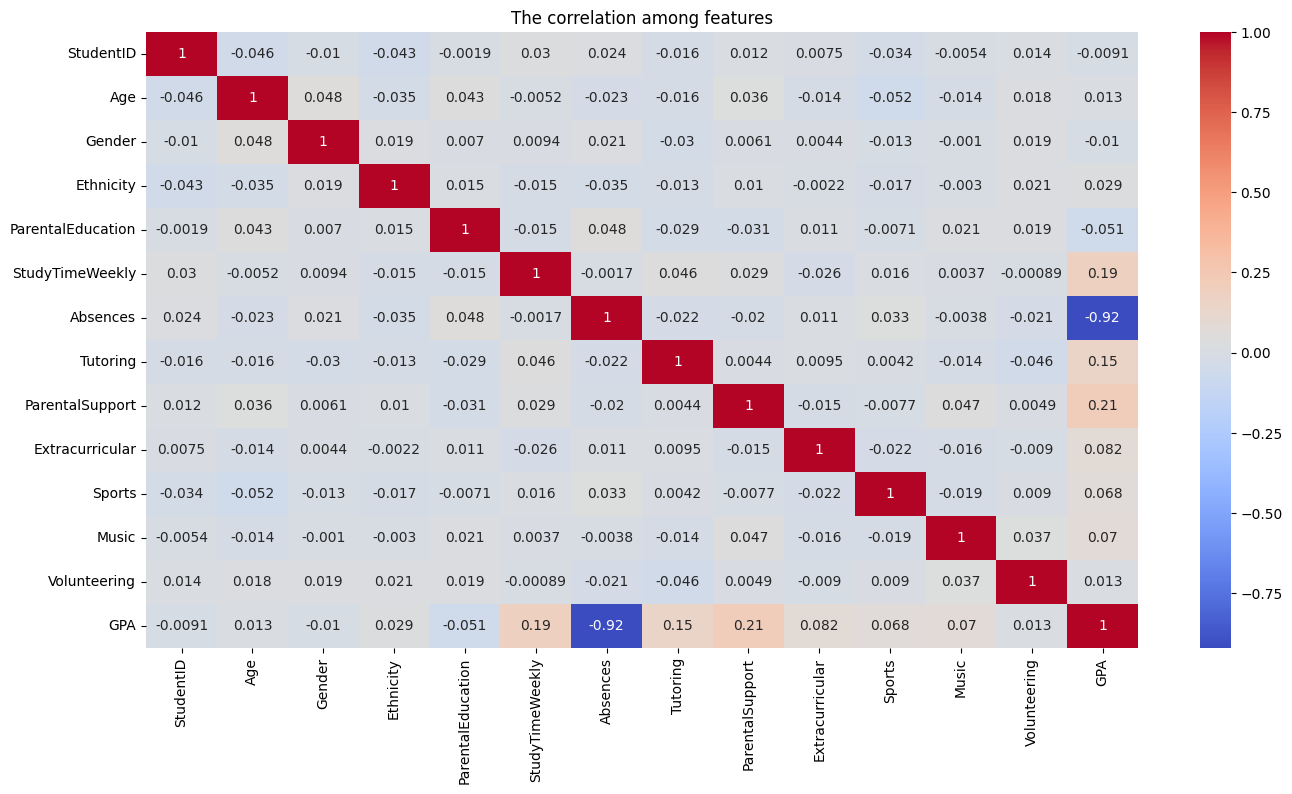

In [26]:
plt.figure(figsize=(16, 8))
sns.heatmap(X_train_en.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features')
plt.show()

## 불필요한 컬럼 제거

In [27]:
X_train.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
653,1654,15,0,2,3,1.901131,7.0,0,2,0,0,0,0,2.039564
200,1201,17,0,1,2,10.546218,18.0,0,1,0,0,1,0,1.643462
1606,2607,16,1,1,0,6.177218,27.0,0,1,0,1,0,0,0.423992
1032,2033,15,0,2,1,6.108270,24.0,1,3,1,0,1,0,1.586289
1293,2294,15,1,1,2,0.305297,23.0,0,0,1,0,0,0,0.192625


In [28]:
print('Before removing columns:', X_train_en.shape, X_test_en.shape)
X_train_en = X_train_en.drop(columns=['GPA', 'StudentID', 'Age'], axis=1)
X_test_en = X_test_en.drop(columns=['GPA', 'StudentID', 'Age'],axis=1)
print('After removing columns:', X_train_en.shape, X_test_en.shape)

Before removing columns: (1913, 14) (479, 14)
After removing columns: (1913, 11) (479, 11)


In [29]:
X_train_en.head()

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
653,0,2,3,-1.384170,-0.902052,0,2,0,0,0,0
200,0,1,2,0.152788,0.398611,0,1,0,0,1,0
1606,1,1,0,-0.623951,1.462791,0,1,0,1,0,0
1032,0,2,1,-0.636208,1.108065,1,3,1,0,1,0
1293,1,1,2,-1.667884,0.989822,0,0,1,0,0,0


In [31]:
# Feature importance 시각화
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X_train_en, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train_en.columns).sort_values(ascending=False)

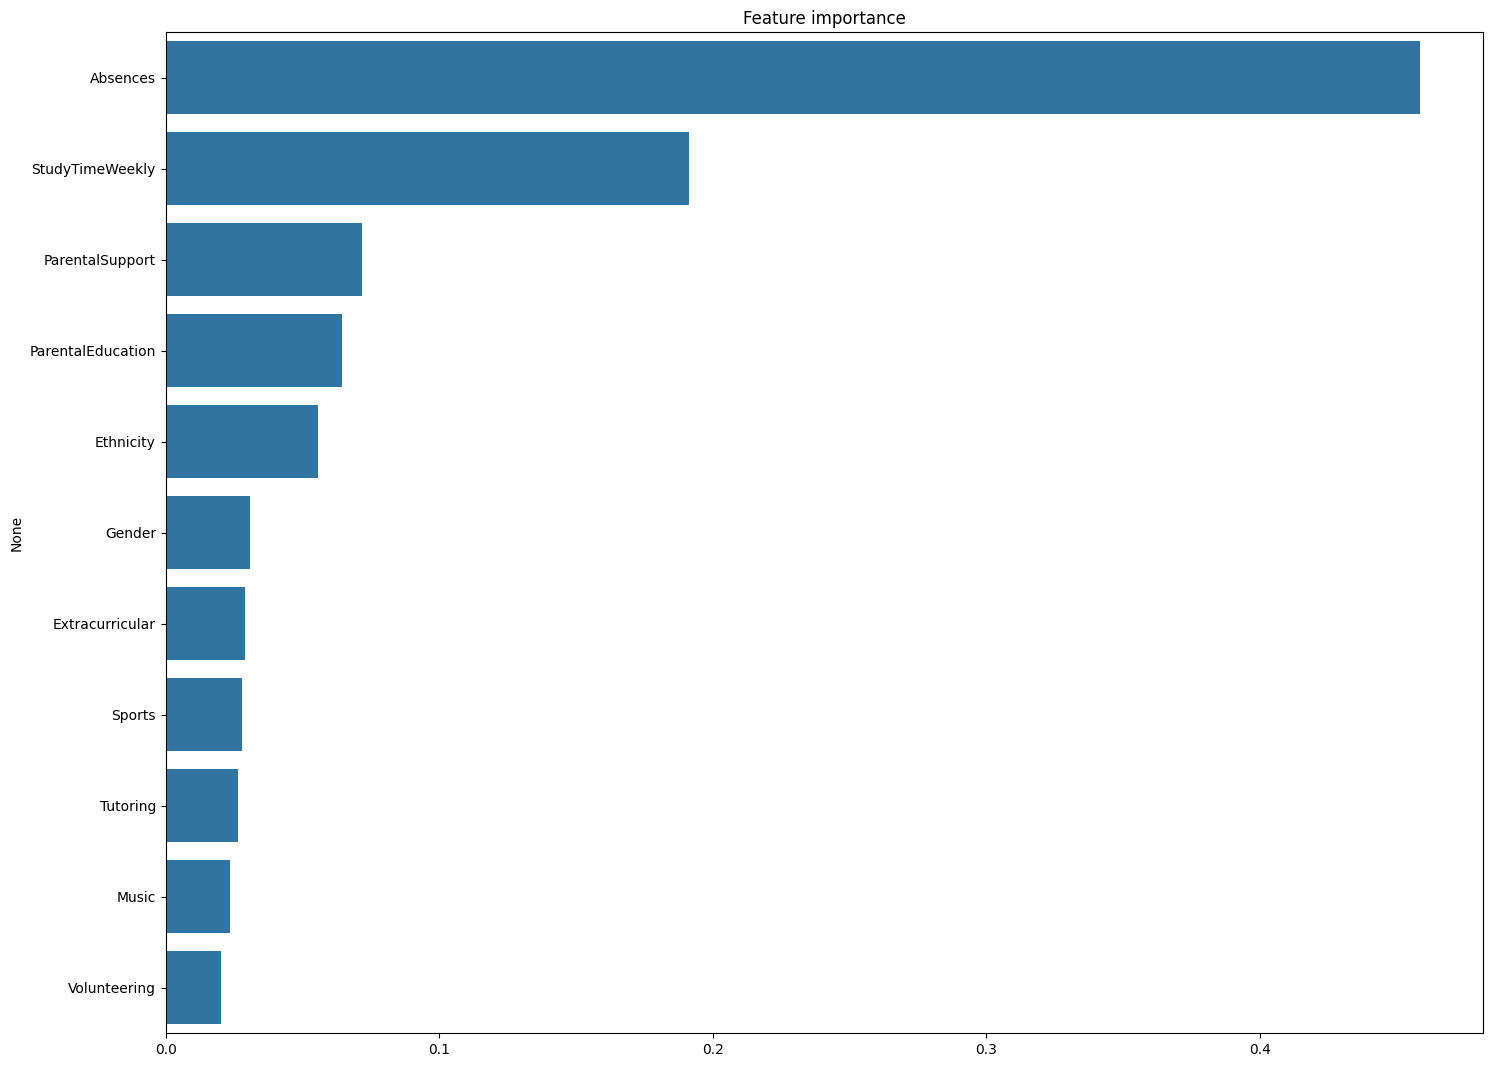

In [32]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

# 모델 훈련

In [33]:
# Dictionary of classification models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
}

model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train_en, y_train)
    score = clf.score(X_test_en, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.72
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.73
Decision Tree accuracy: 0.59
Random Forest accuracy: 0.69
Gradient Boosting accuracy: 0.70
AdaBoost accuracy: 0.68
Gaussian Naive Bayes accuracy: 0.66
XGBoost accuracy: 0.69


# 가장 좋은 모델 찾기

In [34]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Support Vector Machine with an accuracy of 0.73


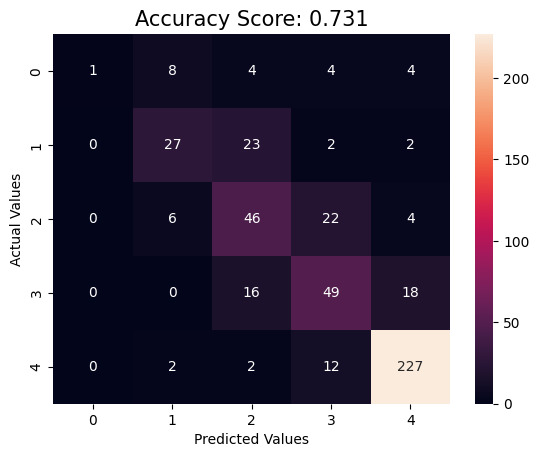

In [35]:
# Initialize and train model
best_model.fit(X_train_en, y_train)
model_score = best_model.score(X_test_en, y_test)
y_pred = best_model.predict(X_test_en)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

# 모델 튜닝

In [36]:
# Define the model
model = SVC()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid
grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }

# Define search
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit search to training data
result = search.fit(X_train_en, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.751867001163467
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


### 유니코드 에러 해결방법
- .venv\Lib\site-packages\joblib\externals\loky\backend\resource_tracker.py 파일 수정
- 196라인 msg = f"{cmd}:{name}:{rtype}\n".encode("utf-8")
- 241라인 splitted = line.strip().decode("utf-8").split(":")


# 모델 재검증

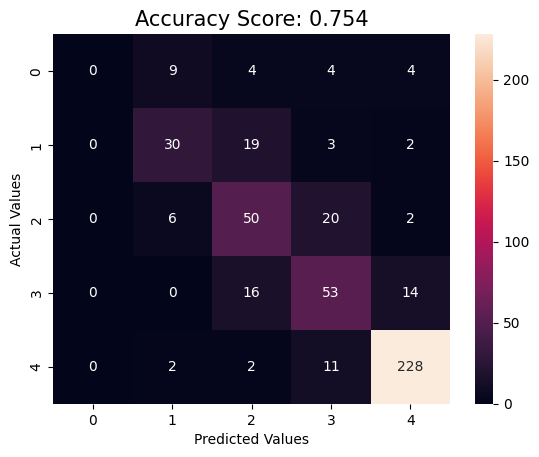

In [39]:
# Initialize and train model
score = result.score(X_test_en, y_test)
y_pred = result.predict(X_test_en)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()